In [1]:
def save_and_open_excel(dataframe, file_name="模型相關數值.xlsx"):
    """
    將給定的 dataframe 保存到指定的 Excel 工作表中，如果工作表已存在則覆蓋，
    並嘗試在支持的應用程式中打開該 Excel 文件。

    :param dataframe: 要保存的 pandas DataFrame。
    :param file_name: Excel 文件的名稱，默認為 'vif_data.xlsx'。
    """
    import pandas as pd
    import os

    # 獲取 dataframe 的變數名稱
    frame_name = [name for name, var in globals().items() if var is dataframe][0]

    # 檢查工作表是否存在，如果不存在則創建
    if not os.path.isfile(file_name):
        with pd.ExcelWriter(file_name, engine="openpyxl") as writer:
            dataframe.to_excel(writer, sheet_name=frame_name, index=False)
    else:
        # 工作表存在，加載工作簿
        with pd.ExcelWriter(
            file_name, engine="openpyxl", mode="a", if_sheet_exists="replace"
        ) as writer:
            dataframe.to_excel(writer, sheet_name=frame_name, index=False)

    # 嘗試打開創建的 Excel 文件
    try:
        os.startfile(file_name)
    except AttributeError:
        # 如果 os.startfile() 不可用（例如在非 Windows 系統上），使用適當的替代方案
        if os.name == "posix":
            os.system(f'open "{file_name}"')
        else:
            os.system(f'start "{file_name}"')
    except Exception as e:
        print(f"打開 Excel 文件時發生錯誤: {e}")

# 載入資料

In [7]:
import pandas as pd

file_path = r"..\最新彙總結果\終板_會總結果0301.xlsx"
# dataset = pd.read_csv(file_path, sep=",", encoding="UTF-8")
dataset = pd.read_excel(file_path)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     4978 non-null   object 
 1   star                     4978 non-null   float64
 2   comment                  4978 non-null   int64  
 3   class                    4978 non-null   object 
 4   address                  4978 non-null   object 
 5   latitude                 4978 non-null   float64
 6   longitude                4978 non-null   float64
 7   bus_count                4978 non-null   int64  
 8   drink_count              4978 non-null   int64  
 9   MRT_count                4978 non-null   int64  
 10  park_count               4978 non-null   int64  
 11  school_count             4978 non-null   int64  
 12  sports_facilities_count  4978 non-null   int64  
 13  age                      4978 non-null   float64
 14  income                  

In [2]:
dataset.describe().round(2)

,star,comment,latitude,longitude,bus_count,department_store_count,drink_count,hospital_count,movie_theater_count,MRT_count,night_market_count,park_count,school_count,sports_facilities_count,train_count,age,income,flow_of_people,average_store_rent
count,4978.00,4978.00,4978.00,4978.00,4978.00,4978.00,4978.00,4978.00,4978.00,4978.00,4978.00,4978.00,4978.00,4978.00,4978.00,4978.00,4978.00,4978.00,4978.00
mean,4.02,134.75,25.04,121.51,53.15,11.64,77.37,1.02,0.76,1.62,0.57,16.57,5.89,9.09,0.16,43.67,510.30,12844.65,8104.43
std,1.05,164.50,0.05,0.08,30.96,17.97,46.56,1.29,1.25,1.39,0.72,7.86,3.10,7.68,0.38,2.16,95.71,12637.36,11820.78
min,0.00,0.00,24.78,121.33,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39.06,330.46,2.61,0.00
25%,3.80,18.00,25.01,121.46,26.00,2.00,40.00,0.00,0.00,0.00,0.00,12.00,4.00,3.00,0.00,42.11,434.49,4972.84,1338.00
50%,4.30,77.00,25.04,121.51,51.00,6.00,74.00,1.00,0.00,2.00,0.00,16.00,6.00,8.00,0.00,43.75,486.60,7143.30,2551.00
75%,4.70,192.00,25.07,121.55,78.00,12.00,110.00,2.00,1.00,2.00,1.00,22.00,8.00,14.00,0.00,44.50,581.38,14205.96,4410.00
max,5.00,998.00,25.29,122.00,130.00,97.00,214.00,7.00,7.00,6.00,5.00,41.00,18.00,35.00,2.00,54.38,715.85,46868.80,38094.00


In [2]:
# 要分析相關性的資料
# selected_data = dataset.iloc[:, 7:36]

"""
將評論數 變成 X
飲料店數量變成 Y
"""
selected_data = pd.concat(
    [
        dataset.iloc[:, 1:3],
        dataset.iloc[:, 7:8],
        dataset.iloc[:, 9:],
        dataset.iloc[:, 8:9],
    ],
    axis=1,
)
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   star                     4978 non-null   float64
 1   comment                  4978 non-null   int64  
 2   bus_count                4978 non-null   int64  
 3   MRT_count                4978 non-null   int64  
 4   park_count               4978 non-null   int64  
 5   school_count             4978 non-null   int64  
 6   sports_facilities_count  4978 non-null   int64  
 7   age                      4978 non-null   float64
 8   income                   4978 non-null   float64
 9   flow_of_people           4978 non-null   float64
 10  average_store_rent       4978 non-null   int64  
 11  drink_count              4978 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 466.8 KB


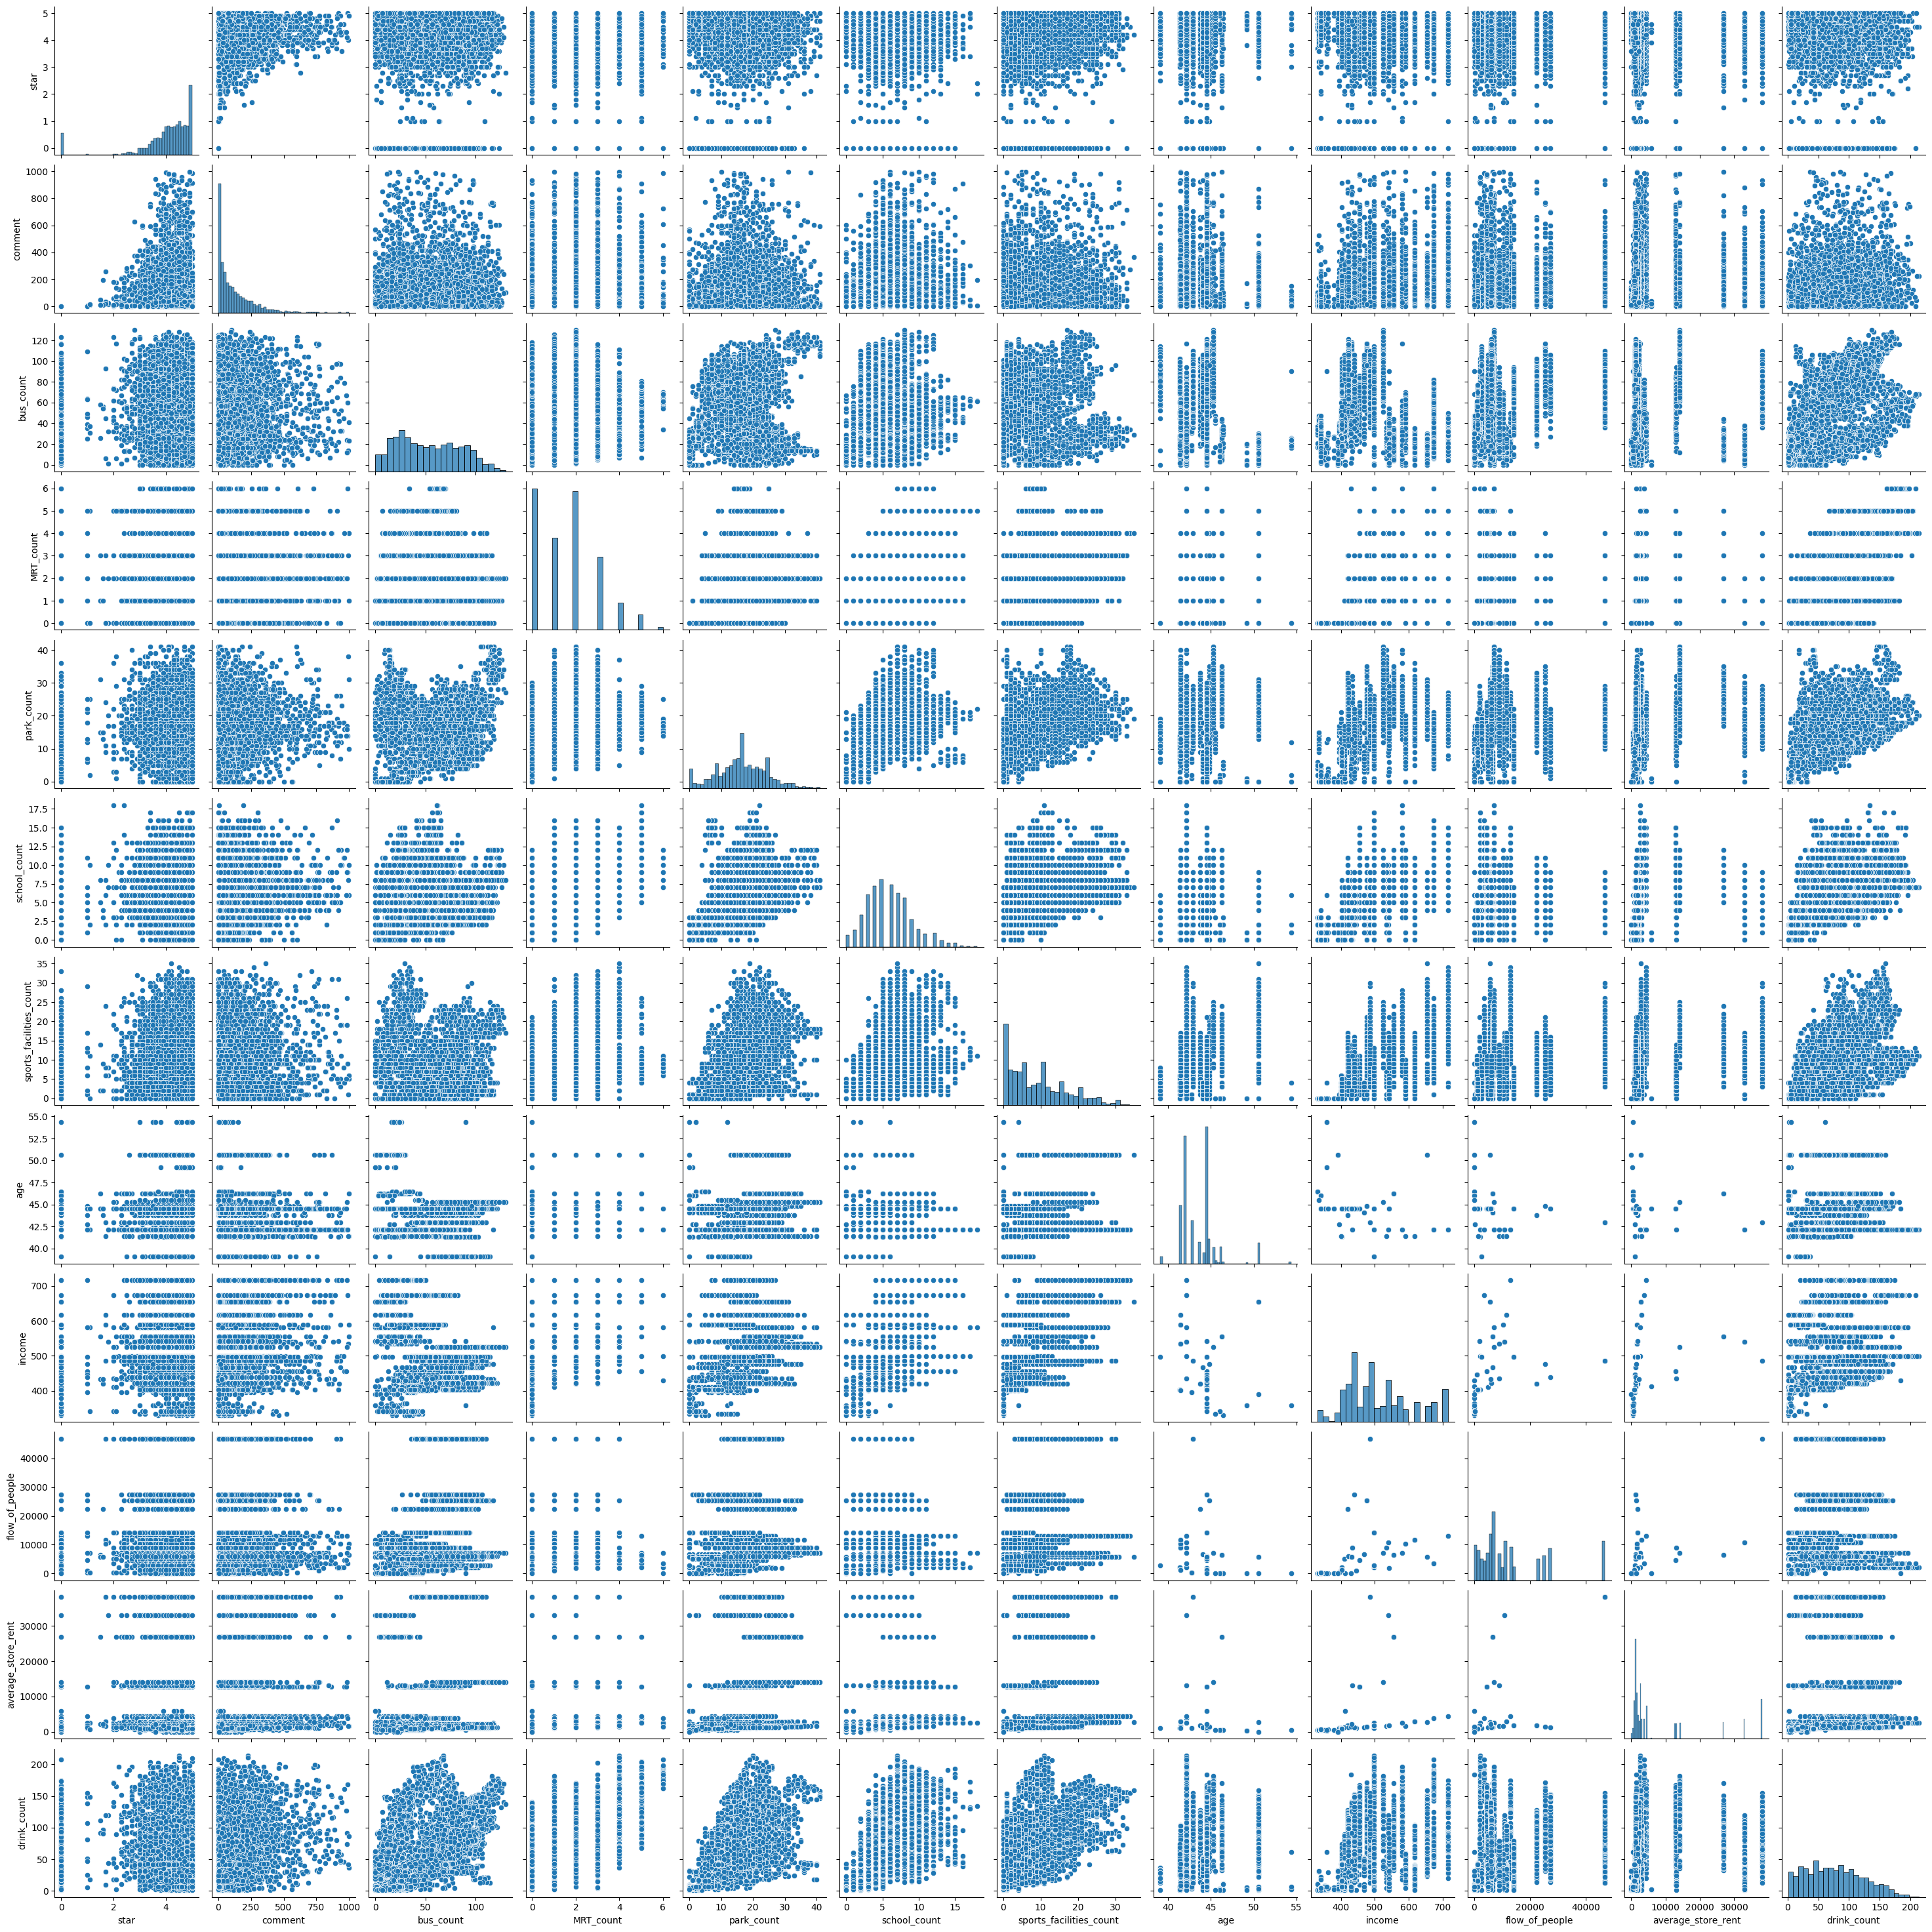

In [5]:
# 參數畫散點圖
import seaborn as sns

sns.pairplot(selected_data)

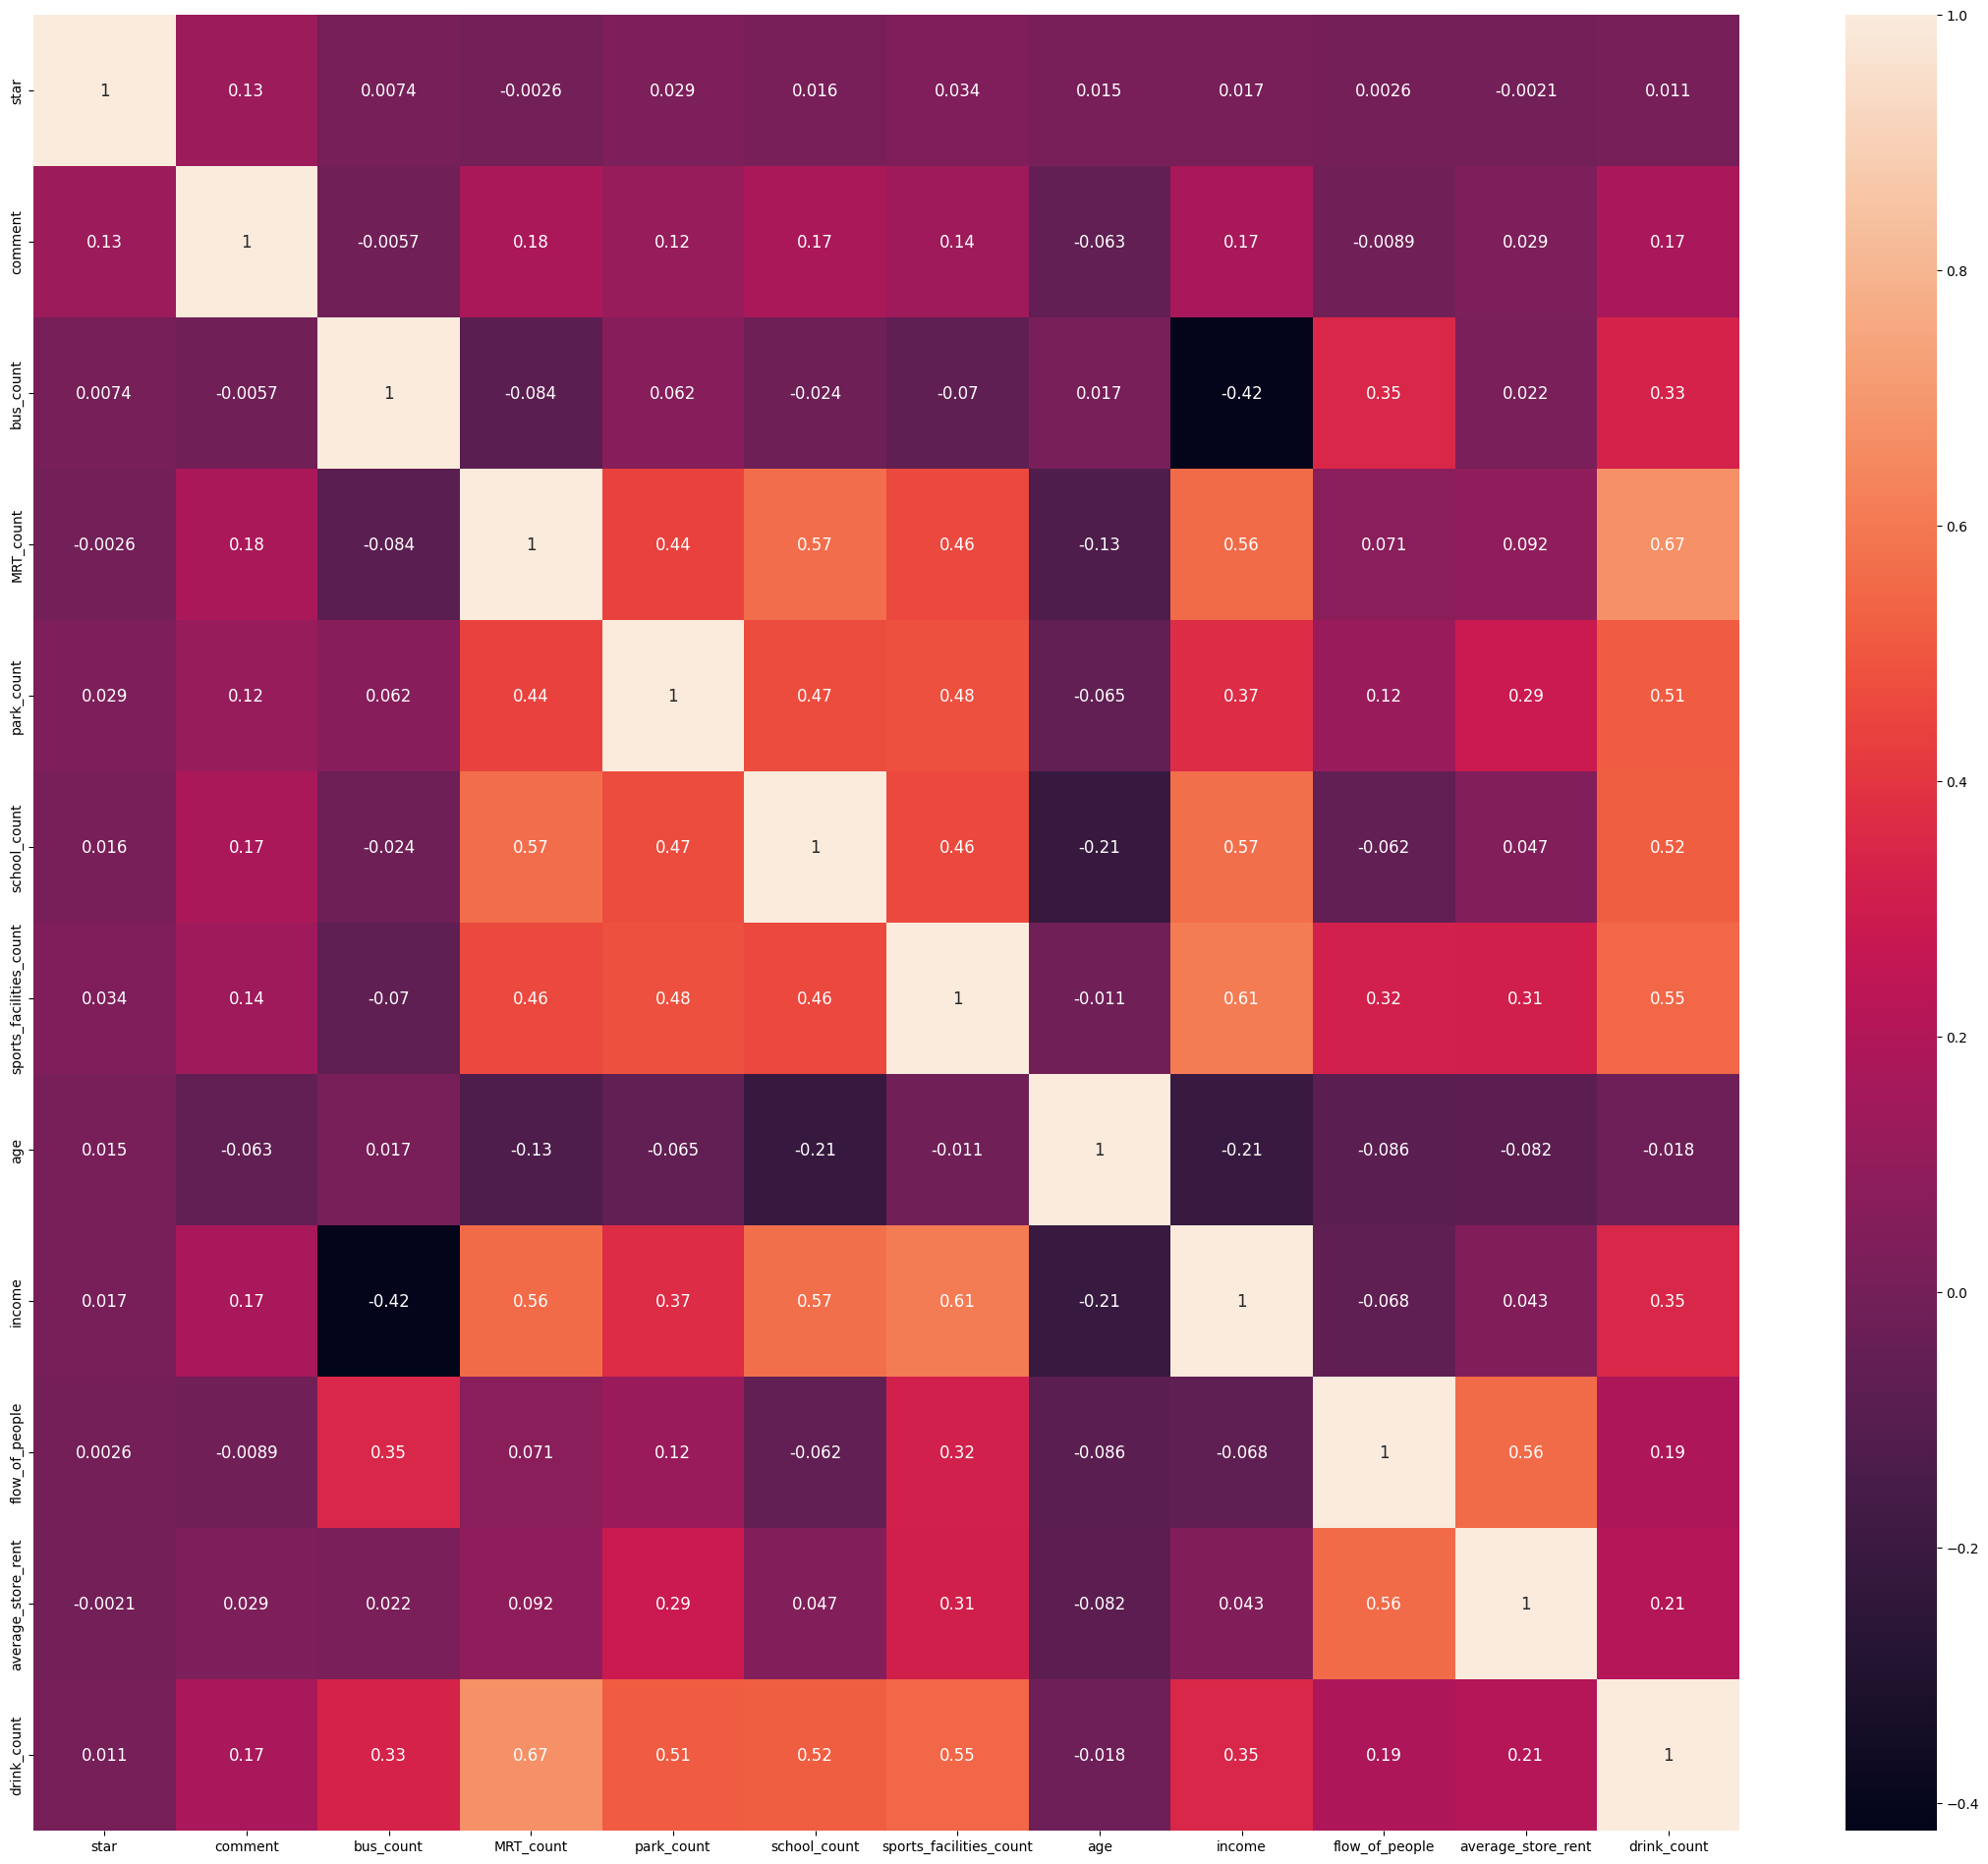

In [3]:
# 計算相關矩陣
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = selected_data.corr()

# 繪製熱力圖
plt.figure(figsize=(28, 24))
sns.heatmap(corrmat, annot=True, annot_kws={"size": 12})
plt.show()

In [4]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 假設 dataset 是您的 DataFrame
# 首先，給數據集添加一個常數項，這對於VIF計算是必要的
dataset_with_constant = add_constant(selected_data)

# 初始化一個空的DataFrame來存儲VIF值
vif_data = pd.DataFrame()
vif_data["feature"] = dataset_with_constant.columns

# 計算每個變數的VIF值並存儲
vif_data["VIF"] = [
    round(variance_inflation_factor(dataset_with_constant.values, i), 2)
    for i in range(dataset_with_constant.shape[1])
]

# save_and_open_excel(vif_data)
vif_data

,feature,VIF
0,const,673.26
1,star,1.02
2,comment,1.07
3,bus_count,2.42
4,MRT_count,2.71
5,park_count,1.64
6,school_count,2.07
7,sports_facilities_count,2.72
8,age,1.16
9,income,3.13


In [ ]:
selected_data = pd.concat(
    [
        dataset.iloc[:, 1:3],
        dataset.iloc[:, 7:9],
        dataset.iloc[:, 10:],
        dataset.iloc[:, 9:10],
    ],
    axis=1,
)

# 訓練集切割

In [8]:
# 設定模型輸入x
X = pd.concat(
    [dataset.iloc[:, 1:3], dataset.iloc[:, 7:9], dataset.iloc[:, 10:]], axis=1
)
y = dataset.iloc[:, 9:10].values.reshape(-1, 1)  # 轉換成1個column。從橫的轉乘直的

# 分割訓練和測試
from sklearn.model_selection import train_test_split

# test_size 切的尺寸 30% random_state讓抽取可以是穩定的結果(第一次抽根第十次抽是一樣的)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25
)

# 模型

## Linear Regression

In [15]:
"""
1.建立空模型
2.擬合
"""

from sklearn.linear_model import LinearRegression

regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

from sklearn.metrics import r2_score

y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

from sklearn.metrics import mean_squared_error
import numpy as np

rmse_linear_train = np.sqrt(mean_squared_error(y_train, y_pred_linear_train))
rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))

print("linear_R2_score (train): ", r2_score_linear_train)
print("linear_R2_score (test): ", r2_score_linear_test)
print("linear_RMSE_score (train): ", rmse_linear_train)
print("linear_RMSE_score (test): ", rmse_linear_test)

linear_R2_score (train):  0.8214053474814594
linear_R2_score (test):  0.8213659636607773
linear_RMSE_score (train):  19.710037999799834
linear_RMSE_score (test):  19.57847325882523


In [16]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1428.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:48:34   Log-Likelihood:                -21891.
No. Observations:                4978   AIC:                         4.382e+04
Df Residuals:                    4961   BIC:                         4.393e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Polynomial regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_squared_error

In [18]:
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # 從sklearn的preprocessing模組中導入PolynomialFeatures類，用於生成一個新的特徵矩陣，其中包含所有多項式組合的特徵，其次數小於或等於指定的度數。

polynomial_reg = PolynomialFeatures(
    degree=3
)  # 創建一個PolynomialFeatures的實例poly_reg，指定多項式的度數為3。

X_polynomial = polynomial_reg.fit_transform(
    X_train
)  # 對訓練數據X_train進行變換，生成多項式特徵。

regressor_polynomial = (
    LinearRegression()
)  # 創建一個線性回歸(Linear Regression)模型的實例。

regressor_polynomial.fit(
    X_polynomial, y_train
)  # 使用包含多項式特徵的X_poly和訓練集的目標值y_train來訓練線性回歸模型。

y_pred_polynomial_train = regressor_polynomial.predict(
    polynomial_reg.fit_transform(X_train)
)  # 對訓練集進行預測。

r2_score_polynomial_train = r2_score(
    y_train, y_pred_polynomial_train
)  # 計算訓練集的R^2分數。

y_pred_polynomial_test = regressor_polynomial.predict(
    polynomial_reg.fit_transform(X_test)
)  # 對測試集進行預測。

r2_score_polynomial_test = r2_score(
    y_test, y_pred_polynomial_test
)  # 計算測試集的R^2分數。

rmse_polynomial_train = np.sqrt(
    mean_squared_error(y_train, y_pred_polynomial_train)
)  # 計算訓練集的均方根誤差(RMSE)。

rmse_polynomial_test = np.sqrt(
    mean_squared_error(y_test, y_pred_polynomial_test)
)  # 計算測試集的均方根誤差(RMSE)。
print("polynomial_R2_score (train): ", r2_score_polynomial_train)
print("polynomial_R2_score (test): ", r2_score_polynomial_test)
print("polynomial_RMSE: ", rmse_polynomial_train)
print("polynomial_RMSE: ", rmse_polynomial_test)

polynomial_R2_score (train):  0.9827038725751697
polynomial_R2_score (test):  0.9402681280441585
polynomial_RMSE:  6.133772641717818
polynomial_RMSE:  11.321390729206955


In [12]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 假設您有一個訓練集 X_train 和目標值 y_train
# 創建多項式特徵
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# 使用Lasso正則化
alpha_lasso = 0.01  # 正則化參數
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_poly_train, y_train)

# 進行預測
y_pred_lasso_train = lasso_model.predict(X_poly_train)
y_pred_lasso_test = lasso_model.predict(X_poly_test)

# 計算R^2分數
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# 計算均方根誤差(RMSE)
rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

print("Lasso正則化:")
print("R2_score (train): ", r2_score_lasso_train)
print("R2_score (test): ", r2_score_lasso_test)
print("RMSE: ", rmse_lasso_train)
print("RMSE: ", rmse_lasso_test)

"""
# 使用Ridge正則化
alpha_ridge = 0.01  # 正則化參數
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_poly, y_train)


y_pred_ridge = ridge_model.predict(X_poly)
r2_score_ridge = r2_score(y_train, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))

print("\nRidge正則化:")
print("R2分數:", r2_score_ridge)

print("RMSE:", rmse_ridge)
"""

Lasso正則化:
R2_score (train):  0.7301286176549306
R2_score (test):  0.7168131473910074
RMSE:  0.7261057045253705
RMSE:  0.7378049577453196


c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.251e+02, tolerance: 6.806e-01
  model = cd_fast.enet_coordinate_descent(


'\n# 使用Ridge正則化\nalpha_ridge = 0.01  # 正則化參數\nridge_model = Ridge(alpha=alpha_ridge)\nridge_model.fit(X_poly, y_train)\n\n\ny_pred_ridge = ridge_model.predict(X_poly)\nr2_score_ridge = r2_score(y_train, y_pred_ridge)\nrmse_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))\n\nprint("\nRidge正則化:")\nprint("R2分數:", r2_score_ridge)\n\nprint("RMSE:", rmse_ridge)\n'

In [35]:
import pandas as pd

alpha_values = []
r2_score_train_values = []
r2_score_test_values = []
rmse_train_values = []
rmse_test_values = []

# 定義alpha_lasso的範圍和增量
alpha_range = np.arange(0.01, 1.01, 0.05)

for alpha_lasso in alpha_range:
    # 使用Lasso正則化
    lasso_model = Lasso(alpha=alpha_lasso)
    lasso_model.fit(X_poly_train, y_train)

    # 進行預測
    y_pred_lasso_train = lasso_model.predict(X_poly_train)
    y_pred_lasso_test = lasso_model.predict(X_poly_test)

    # 計算R^2分數
    r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)
    r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

    # 計算均方根誤差(RMSE)
    rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
    rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

    # 將結果添加到列表中
    alpha_values.append(alpha_lasso)
    r2_score_train_values.append(r2_score_lasso_train)
    r2_score_test_values.append(r2_score_lasso_test)
    rmse_train_values.append(rmse_lasso_train)
    rmse_test_values.append(rmse_lasso_test)

# 創建DataFrame來存儲結果
results_df = pd.DataFrame(
    {
        "Alpha": alpha_values,
        "R2 Score (Train)": r2_score_train_values,
        "R2 Score (Test)": r2_score_test_values,
        "RMSE (Train)": rmse_train_values,
        "RMSE (Test)": rmse_test_values,
    }
)

# 輸出結果表
print(results_df)

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.371e+07, tolerance: 9.172e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.385e+07, tolerance: 9.172e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

    Alpha  R2 Score (Train)  R2 Score (Test)  RMSE (Train)  RMSE (Test)
0    0.01          0.266040        -0.090878    139.007877   177.042844
1    0.06          0.265334        -0.085183    139.074730   176.580124
2    0.11          0.264787        -0.082863    139.126423   176.391236
3    0.16          0.264134        -0.081263    139.188192   176.260922
4    0.21          0.263485        -0.080381    139.249640   176.188992
5    0.26          0.262941        -0.079848    139.301019   176.145500
6    0.31          0.262378        -0.079466    139.354167   176.114372
7    0.36          0.261796        -0.078954    139.409165   176.072610
8    0.41          0.261266        -0.078661    139.459220   176.048690
9    0.46          0.260735        -0.078274    139.509337   176.017132
10   0.51          0.260192        -0.077933    139.560528   175.989235
11   0.56          0.259661        -0.077504    139.610668   175.954237
12   0.61          0.259129        -0.076995    139.660756   175

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.455e+07, tolerance: 9.172e+03
  model = cd_fast.enet_coordinate_descent(


## Ridge regression

In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [16]:
ridgeReg = Ridge(alpha=5.5)  # 創建 Ridge 回歸模型的一個實例，指定 alpha 參數為 5.5

ridgeReg.fit(X_train, y_train)  # 使用訓練數據進行擬合，訓練 Ridge 回歸模型

y_pred_ridge_train = ridgeReg.predict(X_train)  # 對訓練集進行預測

r2_score_ridge_train = ridgeReg.score(X_train, y_train)  # 計算訓練集上的 R2 分數

y_pred_ridge_test = ridgeReg.predict(X_test)  # 對測試集進行預測

r2_score_ridge_test = ridgeReg.score(X_test, y_test)  # 計算測試集上的 R2 分數

rmse_ridge_train = np.sqrt(
    mean_squared_error(y_train, y_pred_ridge_train)
)  # 計算訓練集的均方根誤差(RMSE)

rmse_ridge_test = np.sqrt(
    mean_squared_error(y_test, y_pred_ridge_test)
)  # 計算測試集的均方根誤差(RMSE)

# print("coef：")
# for i, j in zip(dataset.columns, ridgeReg.coef_[0]):  # 逐一列出模型的係數
#     print(i, j)

print(f"R2_score (train): {r2_score_ridge_train:.4f}")
print(f"R2_score (test): {r2_score_ridge_test:.4f}")
print(f"RMSE (train): {rmse_ridge_train:.4f}")
print(f"RMSE (test): {rmse_ridge_test:.4f}")

R2_score (train): 0.6358
R2_score (test): 0.6203
RMSE (train): 0.8436
RMSE (test): 0.8543


## 隨機森林


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

# 使用隨機森林模型
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train, y_train)

# 評估隨機森林模型
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)
rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
rmse_rf_test = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))

# 打印評估結果
print("Random Forest R2 Score (train): ", r2_score_rf_train)
print("Random Forest R2 Score (test): ", r2_score_rf_test)
print("Random Forest RMSE Score (train): ", rmse_rf_train)
print("Random Forest RMSE Score (test): ", rmse_rf_test)

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest R2 Score (train):  0.986821275793802
Random Forest R2 Score (test):  0.8920697503550259
Random Forest RMSE Score (train):  0.16045679626391332
Random Forest RMSE Score (test):  0.455487661052214


## Xgboost


In [ ]:
pip install xgboost -q
print ("pip install xgboost OK")

In [14]:
from xgboost import XGBRegressor

# 使用XGBoost模型
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train, y_train)

# 評估XGBoost模型
y_pred_xgb_train = regressor_xgb.predict(X_train)
r2_score_xgb_train = r2_score(y_train, y_pred_xgb_train)
y_pred_xgb_test = regressor_xgb.predict(X_test)
r2_score_xgb_test = r2_score(y_test, y_pred_xgb_test)
rmse_xgb_train = np.sqrt(mean_squared_error(y_train, y_pred_xgb_train))
rmse_xgb_test = np.sqrt(mean_squared_error(y_test, y_pred_xgb_test))

print("XGBoost R2 Score (train): ", r2_score_xgb_train)
print("XGBoost R2 Score (test): ", r2_score_xgb_test)
print("XGBoost RMSE Score (train): ", rmse_xgb_train)
print("XGBoost RMSE Score (test): ", rmse_xgb_test)

XGBoost R2 Score (train):  0.9894069486686706
XGBoost R2 Score (test):  0.8781496182621877
XGBoost RMSE Score (train):  0.1438573216522285
XGBoost RMSE Score (test):  0.48397003471885536
